In [3]:
import axelrod as axl
import numpy as np

from axelrod.action import Action
from axelrod.strategies.lookerup import Plays

import opt_mo
import pandas as pd
C, D = Action.C, Action.D

In [4]:
import matplotlib.pyplot as plt
import matplotlib

In [5]:
color = matplotlib.cm.viridis(0.3)

In [4]:
font = {"size": 10, "weight": "bold"}
matplotlib.rc("font", **font)

In [5]:
params = [1, 1, 2]

In [6]:
df_with_g = opt_mo.tools.read_sql_data_frame('../data/with_gambler/main_seed_two.db')
df = opt_mo.tools.read_sql_data_frame('../data/with_gambler/main.db')

In [7]:
df_with_g.describe()

,exp_index,first_opponent_q_1,first_opponent_q_2,first_opponent_q_3,first_opponent_q_4,second_opponent_q_1,second_opponent_q_2,second_opponent_q_3,second_opponent_q_4,mem_one_p_1,...,gambler_paramater_p_8,gambler_paramater_p_9,gambler_paramater_p_10,gambler_paramater_p_11,gambler_paramater_p_12,gambler_paramater_p_13,gambler_paramater_p_14,gambler_paramater_p_15,gambler_paramater_p_16,gambler_utility
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,...,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,125.000000,0.513896,0.470928,0.597653,0.473980,0.541895,0.513011,0.480965,0.440549,0.299509,...,0.389652,0.078667,0.108201,0.567258,0.502603,0.183163,0.275880,0.565136,0.549509,3.025047
std,14.866069,0.311450,0.251721,0.299305,0.322340,0.251007,0.314000,0.288136,0.272503,0.426735,...,0.395668,0.264050,0.305578,0.365823,0.403852,0.349172,0.446284,0.407768,0.401888,0.584790
min,100.000000,0.001510,0.030188,0.016764,0.001682,0.024474,0.001633,0.015054,0.016723,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.657485
25%,112.500000,0.240519,0.217648,0.398800,0.192808,0.369625,0.217279,0.250955,0.191557,0.000000,...,0.000000,0.000000,0.000000,0.201530,0.040094,0.000000,0.000000,0.121072,0.137130,2.563600
50%,125.000000,0.517321,0.459279,0.698165,0.486034,0.549936,0.553237,0.480718,0.515128,0.000000,...,0.244319,0.000000,0.000000,0.643571,0.439430,0.000000,0.000000,0.657737,0.586816,3.050920
75%,137.500000,0.822582,0.630750,0.814844,0.749597,0.741645,0.777929,0.687348,0.644855,0.779014,...,0.827516,0.000000,0.000000,0.874630,1.000000,0.050247,0.951019,1.000000,1.000000,3.423110
max,150.000000,0.979050,0.901108,0.990255,0.965490,0.978199,0.977985,0.991445,0.998740,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.376960


In [8]:
df.describe()

,exp_index,first_opponent_q_1,first_opponent_q_2,first_opponent_q_3,first_opponent_q_4,second_opponent_q_1,second_opponent_q_2,second_opponent_q_3,second_opponent_q_4,mem_one_p_1,...,gambler_paramater_p_8,gambler_paramater_p_9,gambler_paramater_p_10,gambler_paramater_p_11,gambler_paramater_p_12,gambler_paramater_p_13,gambler_paramater_p_14,gambler_paramater_p_15,gambler_paramater_p_16,gambler_utility
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,...,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,18.500000,0.494664,0.560550,0.561444,0.510381,0.423906,0.533946,0.494666,0.497240,0.144303,...,0.357314,0.026316,0.052632,0.350681,0.604342,0.210526,0.264664,0.540428,0.408637,3.254628
std,11.113055,0.277389,0.295144,0.284696,0.321851,0.296850,0.265640,0.313980,0.271203,0.324637,...,0.401908,0.162221,0.226294,0.419164,0.417697,0.413155,0.425210,0.422068,0.410205,0.624426
min,0.000000,0.012278,0.011655,0.023616,0.072436,0.000452,0.016881,0.000403,0.041736,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.925565
25%,9.250000,0.243226,0.303355,0.375676,0.208085,0.184621,0.364944,0.238566,0.244700,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.168552,0.000000,0.000000,0.098545,0.000000,2.847236
50%,18.500000,0.525460,0.659452,0.626408,0.472375,0.449516,0.508900,0.504930,0.508181,0.000000,...,0.190992,0.000000,0.000000,0.128079,0.809551,0.000000,0.000000,0.620931,0.376710,3.206110
75%,27.750000,0.680785,0.778172,0.788022,0.861118,0.645325,0.732038,0.756823,0.755042,0.010746,...,0.717107,0.000000,0.000000,0.838169,1.000000,0.000000,0.663429,1.000000,0.810679,3.556386
max,37.000000,0.965242,0.983214,0.960495,0.998631,0.986339,0.996817,0.999129,0.973859,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.638720


In [9]:
df_with_g = pd.concat([df, df_with_g])

In [10]:
df_with_g.describe()

,exp_index,first_opponent_q_1,first_opponent_q_2,first_opponent_q_3,first_opponent_q_4,second_opponent_q_1,second_opponent_q_2,second_opponent_q_3,second_opponent_q_4,mem_one_p_1,...,gambler_paramater_p_8,gambler_paramater_p_9,gambler_paramater_p_10,gambler_paramater_p_11,gambler_paramater_p_12,gambler_paramater_p_13,gambler_paramater_p_14,gambler_paramater_p_15,gambler_paramater_p_16,gambler_utility
count,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,...,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000
mean,79.528090,0.505685,0.509193,0.582193,0.489522,0.491517,0.521950,0.486815,0.464754,0.233241,...,0.375844,0.056315,0.084475,0.474787,0.546042,0.194846,0.271091,0.554586,0.489362,3.123070
std,54.626852,0.295901,0.273158,0.292066,0.320808,0.276212,0.292913,0.297772,0.271868,0.392096,...,0.396391,0.226622,0.274501,0.401892,0.410593,0.375804,0.434989,0.411735,0.409181,0.609333
min,0.000000,0.001510,0.011655,0.016764,0.001682,0.000452,0.001633,0.000403,0.016723,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.657485
25%,22.000000,0.240103,0.222532,0.392837,0.206098,0.276563,0.257277,0.240013,0.213329,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.097253,0.000000,0.000000,0.097050,0.000000,2.774840
50%,106.000000,0.519778,0.559772,0.650934,0.479100,0.495435,0.545001,0.480718,0.508927,0.000000,...,0.224698,0.000000,0.000000,0.507488,0.611954,0.000000,0.000000,0.641269,0.489233,3.107880
75%,128.000000,0.747291,0.702586,0.808047,0.808288,0.737180,0.768322,0.736717,0.681351,0.311839,...,0.817150,0.000000,0.000000,0.871290,1.000000,0.000000,0.784417,1.000000,1.000000,3.465700
max,150.000000,0.979050,0.983214,0.990255,0.998631,0.986339,0.996817,0.999129,0.998740,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.638720


In [34]:
def get_results(row):
    op_one = row[1:5].values
    op_two = row[5:9].values
    
    opponents = [axl.MemoryOnePlayer(p) for p in [op_one, op_two]]

    ps = row[9:13].values
    best_response = axl.MemoryOnePlayer(ps)
    best_response.name = 'Best Response Memory One'
    
    pattern = row[27:-1].values
    
    parameters = Plays(
    self_plays=params[0], op_plays=params[1], op_openings=params[2]
    )
    size = opt_mo.get_lookup_table_size(params)

    initial_action = [
        np.random.choice([C, D], p=[pattern[0], 1 - pattern[0]])
        for _ in range(size)
    ]

    gambler = axl.Gambler(
        pattern=pattern[1:],
        parameters=parameters,
        initial_actions=initial_action,
    )
    
    edges = [(0, 2), (0, 3), (1, 2), (1, 3)]
    
    players = [best_response, gambler] + opponents
    
    tournament = axl.Tournament(
        players=players, turns=500, edges=edges, repetitions=1000
    )
    results = tournament.play(progress_bar=False)
    
    return results

In [35]:
import tqdm

In [36]:
results = []
for i, row in tqdm.tqdm(df_with_g.iterrows()):
    result = get_results(row)
    
    results.append(result)

0it [00:00, ?it/s]/anaconda3/envs/opt-mo/lib/python3.6/site-packages/axelrod/result_set.py:413: RuntimeWarning: invalid value encountered in true_divide
  / sum(map(np.array, self.match_lengths))
89it [8:41:42, 104.68s/it] 


In [38]:
dfs = []
for result in results:
    dfs.append(pd.DataFrame(result.summarise()))
    
df = pd.concat(dfs)
df.to_csv('../data/tournament_results.csv')

Once the results have been generated
-------------------------------------

In [6]:
results = pd.read_csv('../data/tournament_results.csv')

In [7]:
results.describe()

,Unnamed: 0,Rank,Median_score,Cooperation_rating,Wins,Initial_C_rate,CC_rate,CD_rate,DC_rate,DD_rate,CC_to_C_rate,CD_to_C_rate,DC_to_C_rate,DD_to_C_rate
count,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000
mean,1.500000,1.500000,1.947954,0.332246,0.994382,0.831461,0.048299,0.283946,0.283946,0.383808,0.361658,0.294487,0.212051,0.341159
std,1.119608,1.119608,1.321477,0.301458,0.975746,0.374871,0.153135,0.283581,0.270299,0.182097,0.358350,0.335217,0.331034,0.362100
min,0.000000,0.000000,0.025000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.750000,0.750000,0.557750,0.002735,0.000000,1.000000,0.001000,0.000108,0.000941,0.251202,0.000000,0.000000,0.000000,0.000000
50%,1.500000,1.500000,2.076000,0.284052,1.000000,1.000000,0.002265,0.195542,0.242159,0.386860,0.259000,0.135865,0.000000,0.211810
75%,2.250000,2.250000,3.098000,0.580113,2.000000,1.000000,0.028539,0.521476,0.523923,0.522695,0.678494,0.614733,0.432628,0.654042
max,3.000000,3.000000,4.627000,1.000000,2.000000,1.000000,0.984845,0.977662,0.905119,0.874350,1.000000,1.000000,1.000000,1.000000


In [8]:
gamblers_results = results[results['Name'].str.contains('Gambler')]
best_results = results[results['Name'].str.contains('Best Response')]

In [9]:
gamblers_results.describe()

,Unnamed: 0,Rank,Median_score,Cooperation_rating,Wins,Initial_C_rate,CC_rate,CD_rate,DC_rate,DD_rate,CC_to_C_rate,CD_to_C_rate,DC_to_C_rate,DD_to_C_rate
count,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000
mean,0.303371,0.303371,3.115854,0.101585,1.865169,0.325843,0.047725,0.053860,0.516875,0.381541,0.217840,0.087434,0.058630,0.181278
std,0.646749,0.646749,0.616130,0.186095,0.404267,0.471344,0.151840,0.080814,0.179588,0.159943,0.353250,0.234692,0.201103,0.331802
min,0.000000,0.000000,1.687000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.750000,0.000000,2.000000,0.000000,0.000000,0.000000,0.422736,0.275613,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,3.104000,0.002587,2.000000,0.000000,0.002000,0.000843,0.535772,0.384959,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,3.460000,0.168960,2.000000,1.000000,0.034739,0.111001,0.615041,0.510311,0.320753,0.000000,0.000000,0.212442
max,3.000000,3.000000,4.621500,1.000000,2.000000,1.000000,0.969891,0.358300,0.903535,0.769677,1.000000,1.000000,1.000000,1.000000


In [10]:
best_results.describe()

,Unnamed: 0,Rank,Median_score,Cooperation_rating,Wins,Initial_C_rate,CC_rate,CD_rate,DC_rate,DD_rate,CC_to_C_rate,CD_to_C_rate,DC_to_C_rate,DD_to_C_rate
count,89.000000,89.000000,89.000000,89.000000,89.000000,89.0,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000
mean,0.921348,0.921348,3.090702,0.102394,1.865169,1.0,0.048874,0.053520,0.511531,0.386075,0.233352,0.068030,0.022506,0.245522
std,0.527100,0.527100,0.618765,0.194421,0.457041,0.0,0.149191,0.091173,0.175908,0.172780,0.391885,0.205971,0.149047,0.408487
min,0.000000,0.000000,1.512000,0.002000,0.000000,1.0,0.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,2.723000,0.002000,2.000000,1.0,0.002000,0.000000,0.402569,0.250916,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,3.084000,0.002784,2.000000,1.0,0.002466,0.000318,0.520007,0.393946,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,3.432000,0.176747,2.000000,1.0,0.028471,0.092907,0.606696,0.523101,0.316962,0.000000,0.000000,0.397660
max,3.000000,3.000000,4.627000,1.000000,2.000000,1.0,0.969884,0.371465,0.905119,0.768312,1.000000,1.000000,1.000000,1.000000


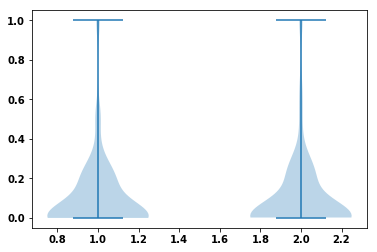

In [48]:
plt.violinplot([gamblers_results['Cooperation_rating'], best_results['Cooperation_rating']]);

TypeError: 'range' object cannot be interpreted as an integer

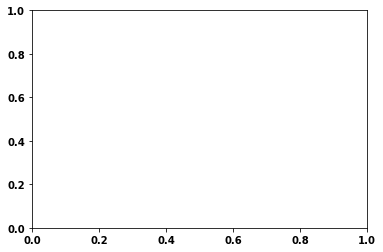

In [39]:
fig, ax = plt.subplots()

plt.scatter(range(x), gambler_coop, label="Gambler(2, 1, 1)", color="black")
plt.scatter(
    range(x),
    best_coop,
    marker="x",
    label="Best response memory-one",
    color="red",
    s=70,
)

plt.ylabel("Cooperating Ratio", fontsize=10, fontweight="bold")
lgd = plt.legend(
    bbox_to_anchor=(0.0, 1.02, 1.0, 0.102),
    loc=3,
    ncol=2,
    mode="expand",
    borderaxespad=0.0,
)

fig.tight_layout()

In [50]:
ps_columns = ["CC_to_C_rate",
              "CD_to_C_rate",
              "DC_to_C_rate",
              "DD_to_C_rate"]

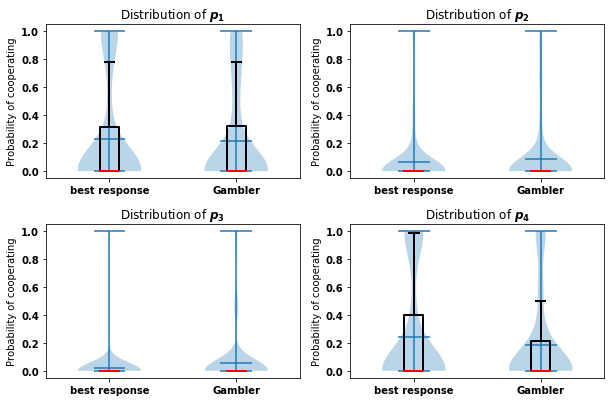

In [52]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6.5))

for i, p in enumerate(ps_columns):
    index = (int(i / 2), i % 2)

    axes[index].violinplot(
        [best_results[p], gamblers_results[p].values],
        showmeans=True,
    )

    boxes = axes[index].boxplot(
        [best_results[p].values, gamblers_results[p].values], showfliers=False
    )
    for bp in boxes['medians']:
        bp.set_color('red')
        bp.set_linewidth(2)
    for bp in boxes['caps']:
        bp.set_color('black')
        bp.set_linewidth(2)
    for bp in boxes['whiskers']:
        bp.set_color('black')
        bp.set_linewidth(2)
    for bp in boxes['boxes']:
        bp.set_color('black')
        bp.set_linewidth(2)

    axes[index].set_title('Distribution of $p_%s$' % (i + 1), fontweight= 'medium')
    axes[index].set_ylabel('Probability of cooperating', fontweight= 'medium')
    matplotlib.pyplot.subplots_adjust(wspace = 0.2, hspace = 0.3)

    plt.setp(axes[index], xticks=[1, 2], xticklabels=["best response", "Gambler"])


    
plt.savefig('../img/gambler_vs_mem_violinplot.pdf')

In [53]:
for q_one, q_two, gambler in zip(df_with_g.loc[:, df_with_g.columns.str.contains('first')].values,
                                    df_with_g.loc[:, df_with_g.columns.str.contains('second')].values,
                                    df_with_g.loc[:, df_with_g.columns.str.contains('gambler_paramater')].values):
    pass

In [54]:
utility = []
x = []
for i, row in df_with_g.iterrows():
    x.append(i)
    p = (row["mem_one_p_1"], row["mem_one_p_2"], row["mem_one_p_3"], row["mem_one_p_4"])
    q_1 = (
        row["first_opponent_q_1"],
        row["first_opponent_q_2"],
        row["first_opponent_q_3"],
        row["first_opponent_q_4"],
    )
    q_2 = (
        row["second_opponent_q_1"],
        row["second_opponent_q_2"],
        row["second_opponent_q_3"],
        row["second_opponent_q_4"],
    )
    utility.append(opt_mo.tournament_utility(p, [q_1, q_2]))


In [55]:
df_with_g["mem_one_utility"] = utility
x = range(len(df_with_g["gambler_utility"]))

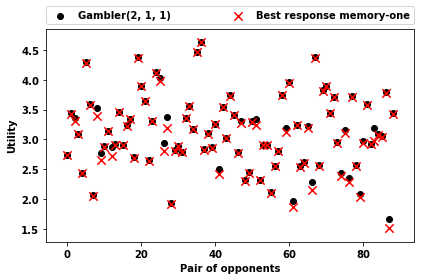

In [56]:
fig, ax = plt.subplots()

plt.scatter(x, df_with_g["gambler_utility"], label="Gambler(2, 1, 1)", color="black")
plt.scatter(
    x,
    df_with_g["mem_one_utility"],
    marker="x",
    label="Best response memory-one",
    color="red",
    s=70,
)

plt.ylabel("Utility", fontsize=10, fontweight="bold")
plt.xlabel("Pair of opponents", fontsize=10, fontweight="bold")
lgd = plt.legend(
    bbox_to_anchor=(0.0, 1.02, 1.0, 0.102),
    loc=3,
    ncol=2,
    mode="expand",
    borderaxespad=0.0,
)

fig.tight_layout()

plt.savefig('../img/gambler_performance_against_mem_one.pdf')

In [57]:
gamblers_results["SSerror"] = gamblers_results.apply(
    lambda row: opt_mo.tools.get_least_squares(
        vector=[
            row["CC_to_C_rate"],
            row["CD_to_C_rate"],
            row["DC_to_C_rate"],
            row["DD_to_C_rate"],
        ]
    ),
    axis=1,
)

/anaconda3/envs/opt-mo/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


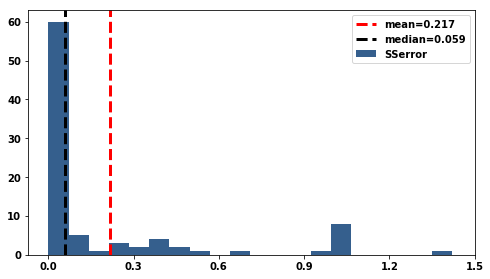

In [58]:
fig, axes = plt.subplots(figsize=(8, 4.5))

axes.hist(gamblers_results["SSerror"], bins=20, color=color);
axes.axvline(
    np.mean(gamblers_results["SSerror"]), color="red", linestyle="dashed", linewidth=3,
    label="mean=%s" % round(np.mean(gamblers_results["SSerror"]), 3)
)
axes.set_xticks(np.linspace(0, 1.5, 6))
axes.axvline(
    np.median(gamblers_results["SSerror"]),
    color="black",
    linestyle="dashed",
    linewidth=3,
    label="median=%s" % round(np.median(gamblers_results["SSerror"]), 3)
)
axes.legend();

plt.savefig('../img/gambler_sserror.pdf')

In [59]:
def describe(df, stats):
    d = df.describe(percentiles=[.05, .25, .30, .35, .5, .95])
    return d.append(df.reindex_axis(d.columns, 1).agg(stats))

In [60]:
sserror_table = pd.DataFrame(pd.DataFrame(describe(gamblers_results, ['median', 'skew', 'kurt'])['SSerror']))
sserror_table.iloc[3] = round(sserror_table.iloc[3], 3)
with open("../tex/gambler_sserror_table.tex", "w") as f:
    f.write(sserror_table.to_latex())

/anaconda3/envs/opt-mo/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [61]:
sserror_table

,SSerror
count,89.000000
mean,0.217056
std,0.332357
min,0.000000
5%,0.008553
25%,0.058824
30%,0.058824
35%,0.058824
50%,0.058824
95%,1.058824
